#Model Optimization Project - Wine

In [4]:
import numpy as np
import pandas as pd 
import os
import numpy as np
import pandas as pd  

print(os.listdir("./input"))

['winequalityN.csv']


In [5]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV                 
from sklearn.model_selection import RandomizedSearchCV    

In [12]:
from xgboost.sklearn import XGBClassifier


from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from xgboost import plot_importance


In [14]:
#Bayes optimization

from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import eli5 as eli5
from eli5.sklearn import PermutationImportance
import time
import gc
import random
from scipy.stats import uniform

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [15]:

pd.set_option('display.max_columns', 100)

In [16]:
#read tge csv fule
df= pd.read_csv("./input/winequalityN.csv")

In [19]:
#view data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [21]:
print(df.shape[0])
print(df.shape[1])

6497
13


In [22]:
print(df.columns.values)

['type' 'fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


In [23]:
df.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [24]:
#dropping missing values
df.dropna(axis=0,inplace=True)

In [27]:
#checking shape after removing NA
print(df.shape[0])
print(df.shape[1])

6463
13


In [106]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


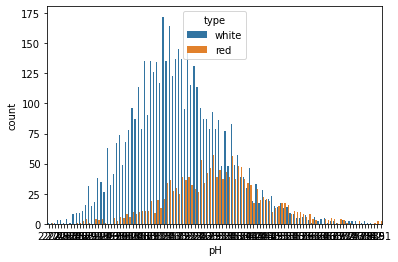

In [107]:
import seaborn as sns
sns.countplot(x = df["pH"], data=df, hue='type')

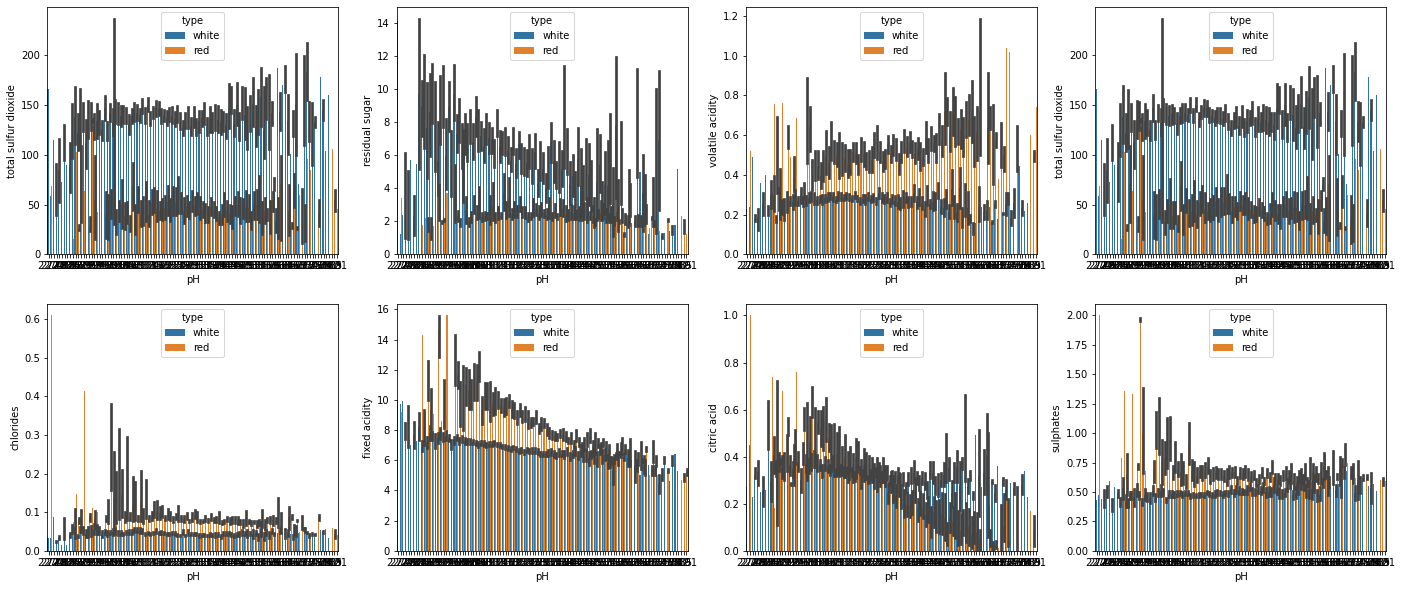

In [113]:
fig = plt.figure(figsize=(24,10))
features = ["total sulfur dioxide", "residual sugar", "volatile acidity", "total sulfur dioxide", "chlorides", "fixed acidity", "citric acid","sulphates"]

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.barplot(x='pH', y=features[i],data=df, hue='type')

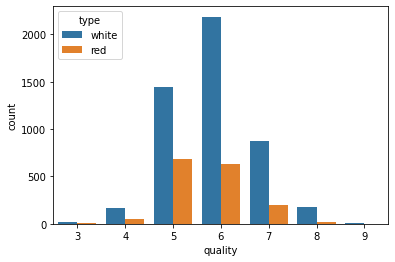

In [112]:
import seaborn as sns
sns.countplot(x = df.quality, data=df, hue='type')

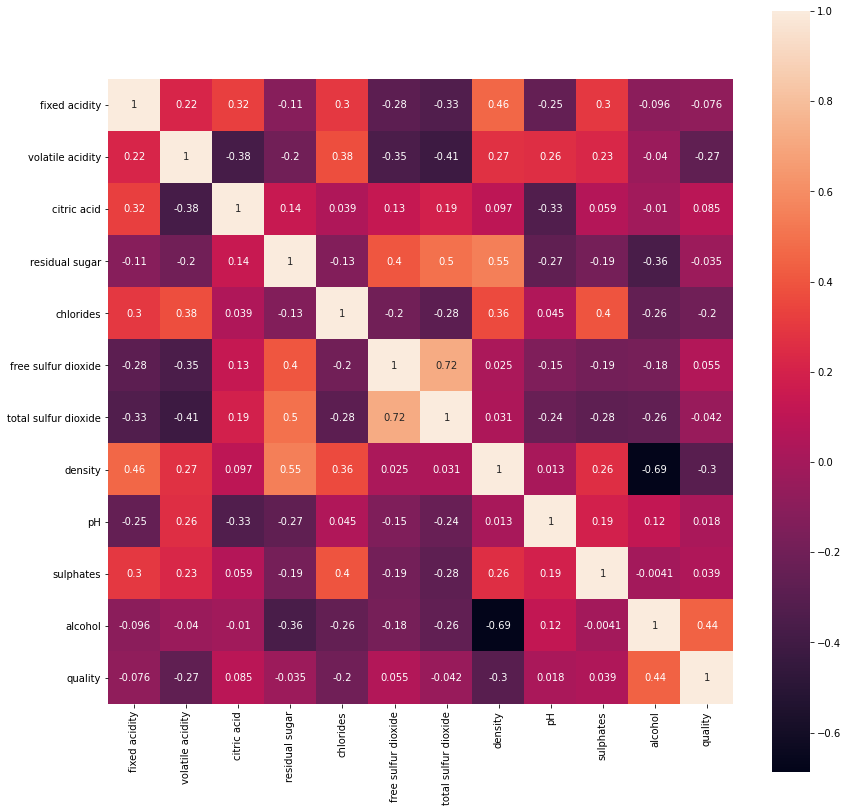

In [30]:
#heat Map correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.iloc[:,0:13].corr(), cbar = True,  square = True, annot=True)

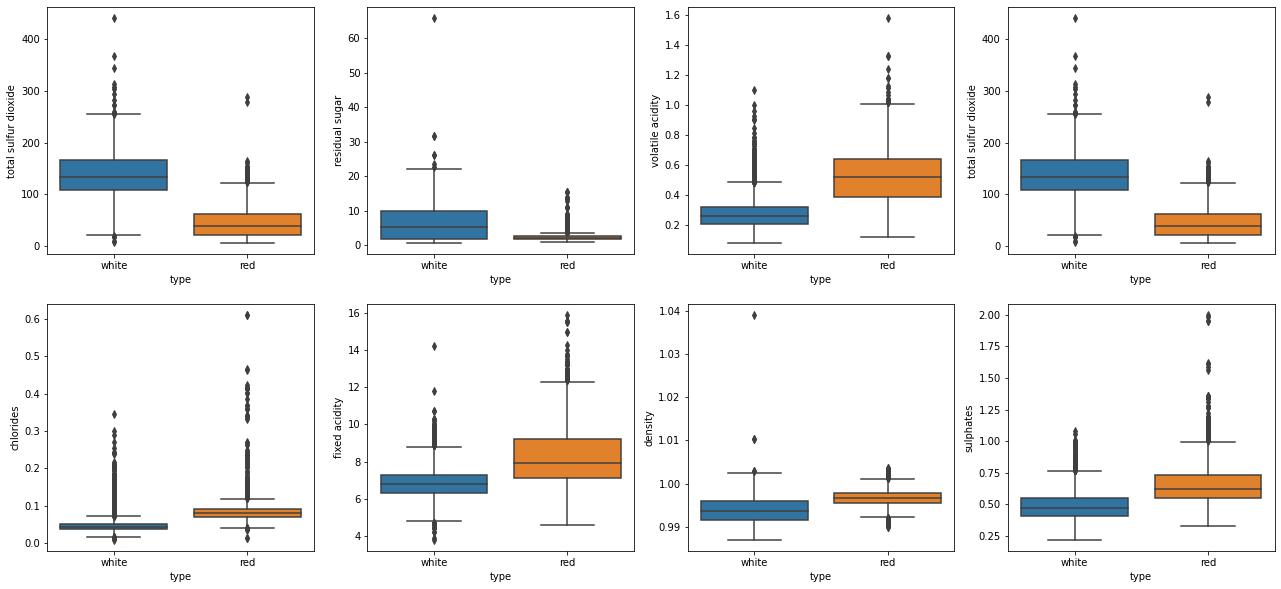

In [110]:
fig = plt.figure(figsize=(22,10))
features = ["total sulfur dioxide", "residual sugar", "volatile acidity", "total sulfur dioxide", "chlorides", "fixed acidity", "density","sulphates"]

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.boxplot(x="type", y=features[i],data=df);

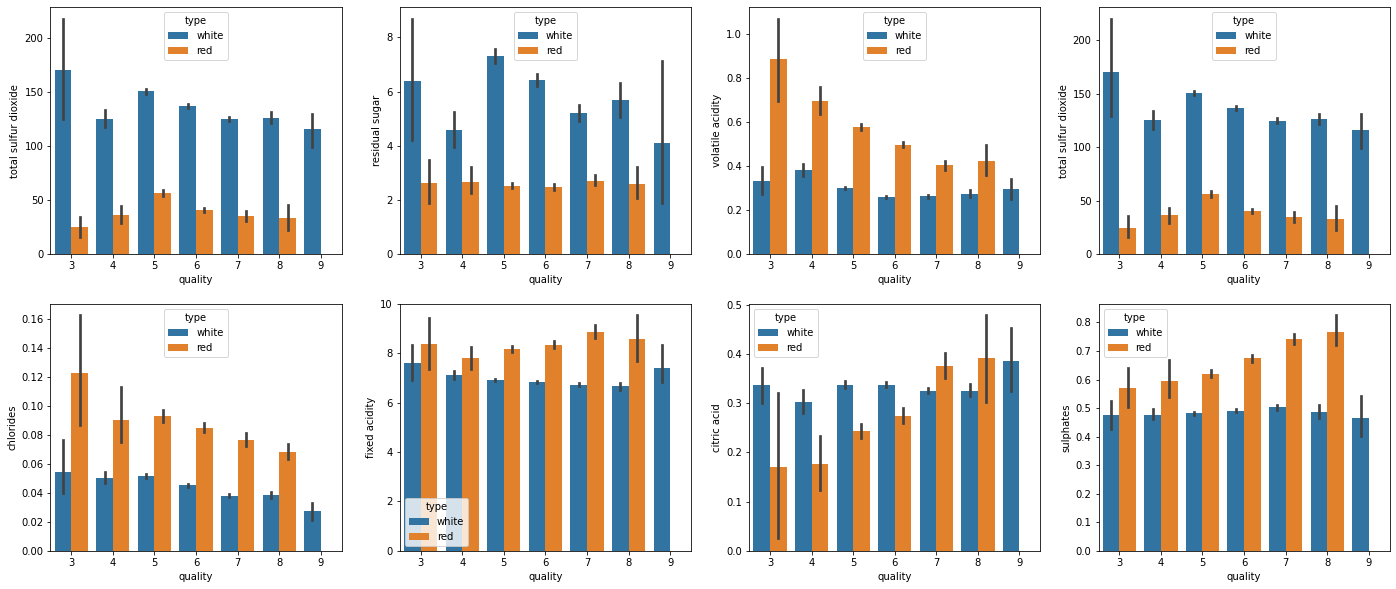

In [32]:
fig = plt.figure(figsize=(24,10))
features = ["total sulfur dioxide", "residual sugar", "volatile acidity", "total sulfur dioxide", "chlorides", "fixed acidity", "citric acid","sulphates"]

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.barplot(x='quality', y=features[i],data=df, hue='type')

In [33]:
#Splitting data into predictors and target
X = df.iloc[ :, 1:13]
y = df.iloc[ : , 0]

In [34]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
y.head()

0    white
1    white
2    white
3    white
4    white
Name: type, dtype: object

In [36]:
#  Map Target data to '1' and '0'
y = y.map({'white':1, 'red' : 0})
y.dtype

dtype('int64')

In [37]:
colnames = X.columns.tolist()
colnames

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [40]:
# Split dataset into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    shuffle = True
                                                    )

In [41]:
#Creating  pipelines

#### Pipe using XGBoost and instantiating it.

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2)        # Specify other parameters here
            )
            ]

pipe_xg = Pipeline(steps_xg)

Grid Search

In [42]:
parameters = {'xg__learning_rate':  [0.05, 0.4],
              'xg__n_estimators':   [50,  80],
              'xg__max_depth':      [3,5],
              'pca__n_components' : [5,8]
              }          

In [43]:
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =2,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [44]:
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
(end - start)/60

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[18:13:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=2)]: Done  32 out of  32 | elapsed:    2.6s finished


0.04553676843643188

In [45]:
f"Best Score: {clf.best_score_} "

'Best Score: 0.9967605047989596 '

In [46]:
f"Best Parameter set {clf.best_params_}"

"Best Parameter set {'pca__n_components': 8, 'xg__learning_rate': 0.4, 'xg__max_depth': 3, 'xg__n_estimators': 80}"

In [47]:
y_pred_gs = clf.predict(X_test)

In [48]:
# Accuracy
accuracy_gs = accuracy_score(y_test, y_pred_gs)
f"Accuracy: {accuracy_gs * 100.0}"

'Accuracy: 99.02011346054668'

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

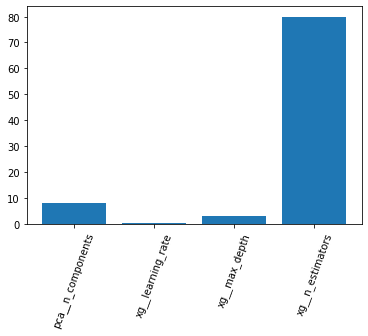

In [49]:
plt.bar(clf.best_params_.keys(), clf.best_params_.values())
plt.xticks(rotation=70)

In [50]:
# Instantiate the importance object
perm = PermutationImportance(
                            clf,
                            random_state=1
                            )

# fit data & learn
start = time.time()
perm.fit(X_test, y_test)
end = time.time()
(end - start)/60

0.00468595027923584

In [51]:
eli5.show_weights(
                  perm,
                  feature_names = colnames      # X_test.columns.tolist()
                  )

Weight,Feature
0.0076 ± 0.0042,volatile acidity
0.0072 ± 0.0033,chlorides
0.0059 ± 0.0026,total sulfur dioxide
0.0046 ± 0.0025,sulphates
0.0024 ± 0.0017,pH
0.0020 ± 0.0012,quality
0.0018 ± 0.0015,alcohol
0.0011 ± 0.0007,fixed acidity
0.0011 ± 0.0008,free sulfur dioxide
0.0008 ± 0.0008,residual sugar


In [52]:
fw = eli5.explain_weights_df(
                  perm,
                  feature_names = colnames      # X_test.columns.tolist()
                  )

fw

,feature,weight,std
0,volatile acidity,0.007619,0.002089
1,chlorides,0.007226,0.001671
2,total sulfur dioxide,0.005871,0.001287
3,sulphates,0.004565,0.001271
4,pH,0.002432,0.000851
5,quality,0.001977,0.000612
6,alcohol,0.001841,0.000754
7,fixed acidity,0.001129,0.000361
8,free sulfur dioxide,0.001059,0.000388
9,residual sugar,0.000818,0.000396


Random Search

In [53]:
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,80),
              'xg__max_depth':      range(3,5),
              'pca__n_components' : range(5,7)}

In [54]:
rs = RandomizedSearchCV(pipe_xg,
                        param_distributions=parameters,
                        scoring= ['roc_auc', 'accuracy'],
                        n_iter=12,          # Max combination of
                                            # parameter to try. Default = 10
                        verbose = 3,
                        refit = 'roc_auc',
                        n_jobs = 2,          # Use parallel cpu threads
                        cv = 2               # No of folds.
                                             # So n_iter * cv combinations
                        )

In [55]:
start = time.time()
rs.fit(X_train, y_train)
end = time.time()
(end - start)/60

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[18:13:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:    1.1s finished


0.02003018061319987

In [56]:
f"Best Score: {rs.best_score_} "

'Best Score: 0.9967089087434255 '

In [57]:
f"Best Parameter set: {rs.best_params_} "

"Best Parameter set: {'pca__n_components': 6, 'xg__learning_rate': 0.6401225052673283, 'xg__max_depth': 3, 'xg__n_estimators': 69} "

In [68]:
# Make predictions
y_pred_rs = rs.predict(X_test)

In [69]:
# Accuracy
accuracy_rs = accuracy_score(y_test, y_pred_rs)
f"Accuracy: {accuracy_rs * 100.0}"

'Accuracy: 98.81382155750387'

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

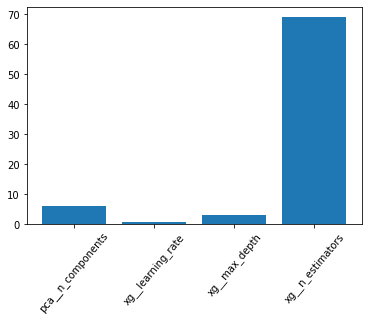

In [70]:
plt.bar(rs.best_params_.keys(), rs.best_params_.values())
plt.xticks(rotation=50)

Bayesian Optimization

In [71]:
para_set = {
           'learning_rate':  (0.3, 0.9),                 
           'n_estimators':   (60,90),               
           'max_depth':      (3,5),                 
           'n_components' :  (5,7)          
            }

In [79]:
def xg_eval(learning_rate,n_estimators, max_depth,n_components):
    #Pipeling for Bayesian Optimization
    pipe_xg1 = make_pipeline (ss(),
                              PCA(n_components=int(round(n_components))),
                              XGBClassifier(
                                           silent = False,
                                           n_jobs=3,
                                           learning_rate=learning_rate,
                                           max_depth=int(round(max_depth)),
                                           n_estimators=int(round(n_estimators))
                                           )
                             )
    #Fitting into pipeline 
    cv_result = cross_val_score(estimator = pipe_xg1,
                                X= X_train,
                                y = y_train,
                                cv = 2,
                                n_jobs = 2,
                                scoring = 'f1'
                                ).mean()             # taking mean of all results

    return cv_result       #Returning final mean of all results of cross val score


In [80]:
xgBO = BayesianOptimization(
                             xg_eval, 
                             para_set 
                             )

In [81]:
start = time.time()
xgBO.maximize(init_points=5,    
               n_iter=25,        
               )
end = time.time()
(end-start)/60

|   iter    |  target   | learni... | max_depth | n_comp... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9911   |  0.5536   |  3.946    |  5.294    |  66.21    |
|  2        |  0.9916   |  0.3709   |  3.236    |  6.104    |  63.12    |
|  3        |  0.9916   |  0.6648   |  4.414    |  6.788    |  76.04    |
|  4        |  0.9918   |  0.3108   |  4.425    |  5.761    |  61.05    |
|  5        |  0.9914   |  0.3529   |  4.59     |  5.279    |  84.11    |
|  6        |  0.993    |  0.3194   |  3.032    |  6.984    |  61.18    |
|  7        |  0.9925   |  0.3335   |  3.371    |  6.909    |  61.41    |
|  8        |  0.9915   |  0.3981   |  3.329    |  6.955    |  60.45    |
|  9        |  0.9924   |  0.791    |  4.723    |  6.689    |  73.84    |
|  10       |  0.9918   |  0.5392   |  3.011    |  6.915    |  61.27    |
|  11       |  0.9912   |  0.6557   |  3.785    |  6.097    |  67.07    |
|  12       |  0.9921   |  0.5329   | 

0.06740803718566894

In [83]:
#Results
xgBO.res

[{'target': 0.9910510197230815,
  'params': {'learning_rate': 0.5535631408323626,
   'max_depth': 3.9459645947795936,
   'n_components': 5.293895926658714,
   'n_estimators': 66.2105968289656}},
 {'target': 0.9916461181364773,
  'params': {'learning_rate': 0.37092993524284873,
   'max_depth': 3.2362614192479207,
   'n_components': 6.10406973820673,
   'n_estimators': 63.1169096474827}},
 {'target': 0.9916404609364005,
  'params': {'learning_rate': 0.664823871616972,
   'max_depth': 4.4135509026712985,
   'n_components': 6.788290371055287,
   'n_estimators': 76.04120924047987}},
 {'target': 0.9917901286326412,
  'params': {'learning_rate': 0.3107973802254896,
   'max_depth': 4.4245693556454295,
   'n_components': 5.760725993509784,
   'n_estimators': 61.054093328029694}},
 {'target': 0.9913530154313832,
  'params': {'learning_rate': 0.3528860757897722,
   'max_depth': 4.589793202111368,
   'n_components': 5.2785838827608345,
   'n_estimators': 84.11195247078112}},
 {'target': 0.99296667

In [84]:
#Best parametrs in maximizing the objective:
xgBO.max

{'target': 0.9934045497608505,
 'params': {'learning_rate': 0.6170324393235359,
  'max_depth': 4.748111957781186,
  'n_components': 6.887975296709131,
  'n_estimators': 60.19123711243405}}

In [85]:
for features in xgBO.max.values():
        print(features)

0.9934045497608505
{'learning_rate': 0.6170324393235359, 'max_depth': 4.748111957781186, 'n_components': 6.887975296709131, 'n_estimators': 60.19123711243405}


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

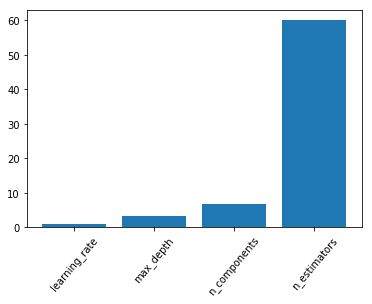

In [54]:
plt.bar(features.keys(), features.values())
plt.xticks(rotation=50)

Fitting parameters in model

In [86]:
# Model with parameters of grid search
model_gs = XGBClassifier(
                    learning_rate = clf.best_params_['xg__learning_rate'],
                    max_depth = clf.best_params_['xg__max_depth'],
                    n_estimators=clf.best_params_['xg__n_estimators']
                    )

#  Model with parameters of random search
model_rs = XGBClassifier(
                    learning_rate = rs.best_params_['xg__learning_rate'],
                    max_depth = rs.best_params_['xg__max_depth'],
                    n_estimators=rs.best_params_['xg__n_estimators']
                    )

#  Model with parameters of Bayesian Optimization
model_bo = XGBClassifier(
                    learning_rate = xgBO.max['params']['learning_rate'],
                    max_depth = int(xgBO.max['params']['max_depth']),
                    n_estimators= int(xgBO.max['params']['n_estimators'])
                    )

In [87]:
start = time.time()
model_gs.fit(X_train, y_train)
model_rs.fit(X_train, y_train)
model_bo.fit(X_train, y_train)
end = time.time()
(end - start)/60

0.004233797391255696

In [88]:
# Predictions with all the models
y_pred_gs = model_gs.predict(X_test)
y_pred_rs = model_rs.predict(X_test)
y_pred_bo = model_bo.predict(X_test)

In [89]:
# Accuracy of all the models
accuracy_gs = accuracy_score(y_test, y_pred_gs)
accuracy_rs = accuracy_score(y_test, y_pred_rs)
accuracy_bo = accuracy_score(y_test, y_pred_bo)
print("Accuracy by Grid Search           = ",accuracy_gs)
print("Accuracy by Random Search         = ",accuracy_rs)
print("Accuracy by Bayesian Optimization = ",accuracy_bo)

Accuracy by Grid Search           =  0.9958741619391439
Accuracy by Random Search         =  0.9958741619391439
Accuracy by Bayesian Optimization =  0.9958741619391439


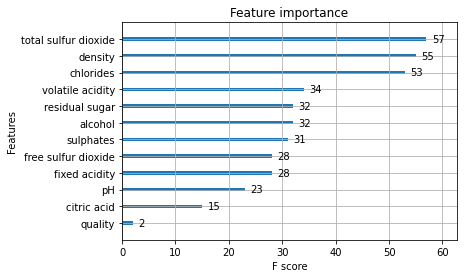

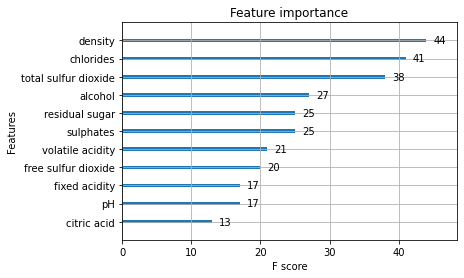

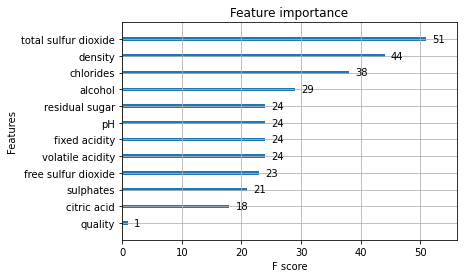

In [90]:
model_gs.feature_importances_
model_rs.feature_importances_
model_bo.feature_importances_
plot_importance(model_gs)
plot_importance(model_rs)
plot_importance(model_bo)

# Confusion matrix for all the models

In [92]:
#Confusion Matrix for Grid Search model
print(confusion_matrix(y_test,y_pred_gs))

[[ 474    5]
 [   3 1457]]


In [93]:
#Confusion Matrix for Random Search model
print(confusion_matrix(y_test,y_pred_rs))

[[ 474    5]
 [   3 1457]]


In [94]:
#Confusion Matrix for Bayesian Optimization model
print(confusion_matrix(y_test,y_pred_bo))

[[ 474    5]
 [   3 1457]]


In [95]:
# Get probability of occurrence of each class
y_pred_prob_gs = model_gs.predict_proba(X_test)
y_pred_prob_rs = model_rs.predict_proba(X_test)
y_pred_prob_bo = model_bo.predict_proba(X_test)

# Draw ROC curve

In [96]:
# calculate fpr, tpr values
fpr_gs, tpr_gs, thresholds = roc_curve(y_test,
                                 y_pred_prob_gs[: , 1],
                                 pos_label= 1
                                 )

fpr_rs, tpr_rs, thresholds = roc_curve(y_test,
                                 y_pred_prob_rs[: , 1],
                                 pos_label= 1
                                 )

fpr_bo, tpr_bo, thresholds = roc_curve(y_test,
                                 y_pred_prob_bo[: , 1],
                                 pos_label= 1
                                 )



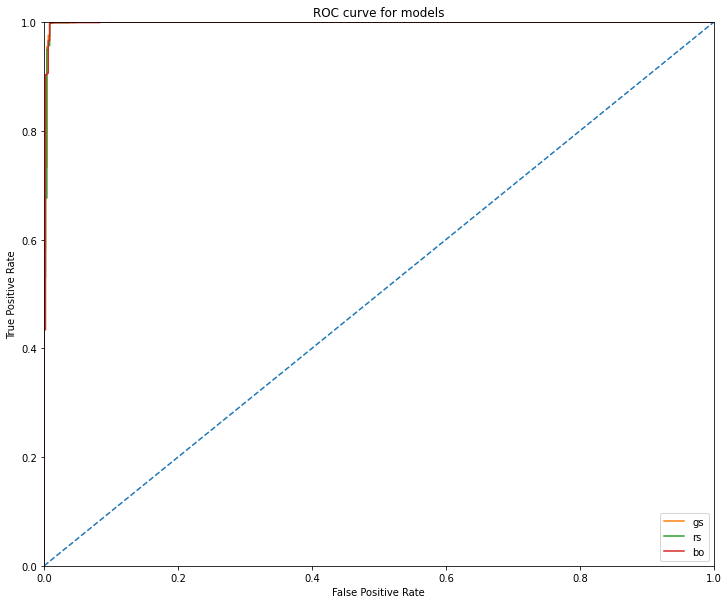

In [97]:
fig = plt.figure(figsize=(12,10))  
ax = fig.add_subplot(111)   # Create axes

#Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")  

#Labels 
ax.set_xlabel('False Positive Rate')  
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

#Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

#Plot each graph now
ax.plot(fpr_gs, tpr_gs, label = "gs")
ax.plot(fpr_rs, tpr_rs, label = "rs")
ax.plot(fpr_bo, tpr_bo, label = "bo")


#Set legend and show plot
ax.legend(loc="lower right")
plt.show()


In [98]:
# Calculate AUC
auc_gs = auc(fpr_gs,tpr_gs)
auc_rs = auc(fpr_rs,tpr_rs)
auc_bo = auc(fpr_bo,tpr_bo)

In [99]:
#Calculate Precision, Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_gs,recall_gs,f1_gs,_ = precision_recall_fscore_support(y_test,y_pred_gs)
precision_rs,recall_rs,f1_rs,_ = precision_recall_fscore_support(y_test,y_pred_rs)
precision_bo,recall_bo,f1_bo,_ = precision_recall_fscore_support(y_test,y_pred_bo)

# Performance Comparision of all models

In [100]:
pc = pd.DataFrame({ "Classifiers":["Grid Search","Random Search",'Bayesian Optimization'],
                             "Accuracy": [accuracy_gs,accuracy_rs,accuracy_bo],
                             "Precision": [precision_gs,precision_rs,precision_bo],
                             "Recall":[recall_gs,recall_rs,recall_bo],
                             "f1_score":[f1_gs,f1_rs,f1_bo],
                             "AUC":[auc_gs,auc_rs,auc_bo]})
pc

,Classifiers,Accuracy,Precision,Recall,f1_score,AUC
0,Grid Search,0.995874,"[0.9937106918238994, 0.9965800273597811]","[0.9895615866388309, 0.9979452054794521]","[0.99163179916318, 0.9972621492128679]",0.998391
1,Random Search,0.995874,"[0.9937106918238994, 0.9965800273597811]","[0.9895615866388309, 0.9979452054794521]","[0.99163179916318, 0.9972621492128679]",0.998123
2,Bayesian Optimization,0.995874,"[0.9937106918238994, 0.9965800273597811]","[0.9895615866388309, 0.9979452054794521]","[0.99163179916318, 0.9972621492128679]",0.998296
